<a href="https://colab.research.google.com/github/hamzaadw/Data-analysis-Practice/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Online Retail.xlsx")



df.dropna(subset=["CustomerID"], inplace = True)
# removing canceled orders
df = df[df['InvoiceNo'].astype(str).str[0] != 'C'].copy()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sort by date
df = df.sort_values(by='InvoiceDate')

# Total Price of purchase
df["totalPrice"] = df["Quantity"] * df["UnitPrice"]


df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00


In [2]:
from logging import StringTemplateStyle
# Which products and countries generate the most revenue?

Most_revenue_Product =  df.groupby('Description')["totalPrice"].sum().sort_values(ascending=False).head(10)

Most_revenue_county = df.groupby('Country')["totalPrice"].sum().sort_values(ascending=False).head(10)

print(Most_revenue_Product)
# PAPER CRAFT , LITTLE BIRDIE  is the most selling product with over 150k dollars of sales followed by REGENCY CAKESTAND 3 TIER .Most_revenue_Product
# these top products contribuites significantly to our revenue.

# we shoudl focus on these products and do markiting over them as the are our treasueres thus increasign thier avaliblity on a resonable
# price will further increaser our sales


print(Most_revenue_county)

# United kingdom as proven to be the Most revenue generating counrty having over 700k dollars of sales as it is the market hub, these sales are way beyond
# of our other 9 countries on top 10 list.

# countries like netherlands and EIRE has shown a great market too but are not in pare with the sales of united kingdom, as these countries have around 250k of
# sales thus marketing and advertising should be done in these countries as they have alot of potential and can give us a greater evenue in future




Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: totalPrice, dtype: float64
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: totalPrice, dtype: float64


           date  daily_revenue
0    2010-12-01       46376.49
1    2010-12-02       47316.53
2    2010-12-03       23921.71
3    2010-12-05       31771.60
4    2010-12-06       31215.64
..          ...            ...
300  2011-12-05       58202.21
301  2011-12-06       46144.04
302  2011-12-07       69354.21
303  2011-12-08       50519.41
304  2011-12-09      184349.28

[305 rows x 2 columns]


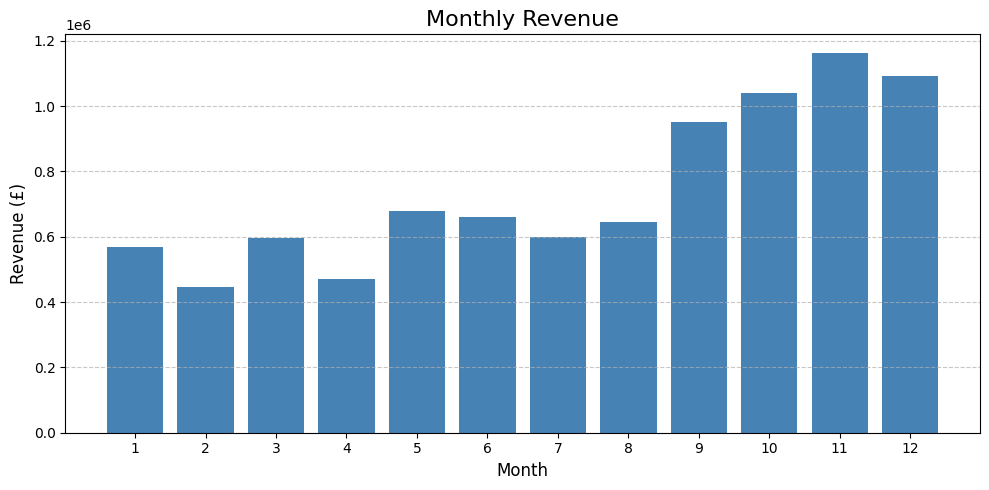

In [3]:
# Monthly and daily revenue trends

df['date'] = df['InvoiceDate'].dt.date
daily_revenue = df.groupby('date')['totalPrice'].sum().reset_index()
daily_revenue.columns = ['date', 'daily_revenue']

print(daily_revenue)

# The daily revenue trend displays frequent spikes and dips, reflecting fluctuating purchasing behavior. Despite this volatility, the overall trajectory is upward, suggesting growing customer engagement or demand over time.
# Notably, sales tend to increase at the beginning of each month, likely due to customer pay cycles, where buyers have more disposable income to spend.
# In contrast, relatively low-revenue days often align with weekends, holidays, or non-working days, when customers may prefer in-store shopping over online purchases.






df['month'] = df['InvoiceDate'].dt.month
monthly_revenue = df.groupby('month')['totalPrice'].sum().reset_index()
monthly_revenue.columns = ['month', 'monthly_revenue']

monthly_revenue


plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue['month'], monthly_revenue['monthly_revenue'], color='steelblue')

plt.title('Monthly Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(monthly_revenue['month'])  # Show 1-12 for months
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# The monthly revenue analysis shows that November (month 11) generated the highest revenue, followed by October and December.
# This spike in sales likely aligns with holiday shopping seasons or seasonal product demand, such as Christmas or end-of-year promotions.
# On the other hand, February recorded the lowest revenue, which may indicate lower customer demand, shorter sales periods, or possibly limited marketing activity.
# Overall, the data suggests a positive revenue trend over the year, highlighting potential growth and increased customer activity over time.



In [4]:
# How many unique customers?
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")


# Our platform currently has 4,339 active users. Among them, a significant portion has made at least one purchase, indicating a
# healthy base of engaged buyers. However, there is substantial room for growth.

# By expanding our marketing efforts and reaching a broader audience, we can increase user acquisition and boost repeat purchases.
#  Strengthening visibility and brand awareness will be key to driving both user and buyer growth in the upcoming months.



Number of unique customers: 4339


In [5]:
# How often do they return (repeat vs one-time)?

customers_data = df.groupby("CustomerID")["InvoiceNo"].nunique()

one_time_customer = customers_data[customers_data == 1]
repeat_customer = customers_data[customers_data > 1]


print(f"Number of one-time customers: {one_time_customer.count()}")

# Out of all users who have made a purchase on our platform, 1,494 were one-time customers —
# meaning they placed an order but did not return for further shopping.
# This highlights a key opportunity: a large portion of our customer base
#  is not re-engaging with the platform after their first purchase.

# To convert one-time buyers into repeat customers, we should increase our efforts in targeted marketing and customer retention. This can be done through:

# Personalized email campaigns

# Discount codes or loyalty rewards

# Retargeting ads in areas where these customers are concentrated

# Collecting feedback to understand why they didn’t return



print(f"Number of repeat customers: {repeat_customer.count()}")


# Out of all users who have made purchases on our platform, 2,845 are repeat customers. This indicates a strong level of customer
# loyalty and satisfaction,as a significant portion of our user base continues to shop with us.
# This is a positive indicator that many users trust our platform and see value in our products or services.
# To further increase this number, we can implement strategies aimed at converting one-time buyers into loyal customers. These may include:

# Exclusive discounts or bundles for returning users

# Trust-building measures like better support, clearer policies, and customer reviews

# Follow-up campaigns with personalized recommendations


Number of one-time customers: 1494
Number of repeat customers: 2845


In [6]:
# Peak hours and active shopping days
df['Hours'] = df['InvoiceDate'].dt.hour
df
peak_hours_shopping = df.groupby('Hours')['totalPrice'].sum().sort_values(ascending=False)
peak_hours_shopping.head(5)

# Our data analysis shows that the busiest shopping period is between 10 AM and 2 PM, with 12 PM being the most active hour, generating over 1,378,571 in sales.
# This surge likely aligns with lunch breaks or free time for most adult customers, leading to increased traffic and conversions during midday.
# However, we observe a noticeable decline in activity after 2 PM, indicating that traffic and sales begin to slow down as the day progresses.

# 💡 Business Strategy Recommendations
# Schedule promotional emails and ads just before peak hours (e.g., 9:30–10:00 AM) to drive early traffic.
# Ensure the website is fully functional, fast, and well-stocked during peak hours (10 AM – 2 PM) to maximize conversions.
#  Consider real-time deals or flash sales around 11 AM–1 PM to push even higher engagement.

df["Days"] = df['InvoiceDate'].dt.day_of_week
df['DayName'] = df['InvoiceDate'].dt.day_name()
active_days = df.groupby('DayName')['totalPrice'].sum().sort_values(ascending=False)

print(active_days)

# Thursday is the most active day with approximatly 2m dollars, followed closely by tuesday and wednesday .
# monday and friday also performs well with over 1m dollars of sales.
# Sunday is the least active day showing that users are less ective on the end of the week.

# so seeing htis email and add campangs should be run form 10 - 2pm in tuesday wednesday and thursday,
# more sales offers and laiblity should be givien to users so it attracts the user for sundays.
# the inventory and web performance are optimized on peak days andpeak hours


DayName
Thursday     1976859.070
Tuesday      1700634.631
Wednesday    1588336.170
Friday       1485917.401
Monday       1367146.411
Sunday        792514.221
Name: totalPrice, dtype: float64
